General library imports:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset into a Pandas DataFrame object:

In [25]:
df_iris = pd.read_csv('iris.csv')
df_iris.tail(5)

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Get Features into a NumPy Array:

In [26]:
X = df_iris[['SepalLength[cm]',	'SepalWidth[cm]',	'PetalLength[cm]', 'PetalWidth[cm]']].values
print(X.shape)

(150, 4)


In [27]:
print(X.ndim)
print(X[:5, :])

2
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Getting class labels into NumPy array:

In [28]:
label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)
df_iris.tail(5)

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [29]:
y = df_iris['ClassLabel'].values
print(y[:10])
print(np.bincount(y))

[0 0 0 0 0 0 0 0 0 0]
[50 50 50]


Shuffle Dataset and Create Training and Test Subsets:

In [30]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [48]:
rnd = np.random.RandomState(13)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 55,  64,  21, 101, 112,  33, 135, 123,  46,  90, 138, 133,  87,
        44, 114,  30, 127, 104,  91,   8,  78,  15,  17, 130,  84, 144,
        14, 118,  63, 132, 137,  32,  31, 141, 146,  97,  23,  66,  68,
        12,  27, 134,  96, 125, 110, 109,  39,  93,  42,  54,  18,  95,
        70, 143,   9,  80,  29,  69, 111, 100,   3,  43, 103,  56, 107,
       116,   4, 106,  60,  77,  48,  20,  35,  50,  57,  67, 108, 105,
        53, 149, 121, 119,  26, 147,  65,  25,  92, 102,  99,  13,  37,
        72,  59,  28,  81, 140,  41, 128,  89,  47, 124,   0,   5,  19,
        94,  36,  62,  61, 131, 145,  10,  83,  38,  86,  79, 115,   6,
       129,   7,  71,  45, 113, 136,  49,  85,  88, 122,  51, 120, 117,
        34,  22,  58,  76,  40,  11,  24,   1, 142, 139,   2,  52,  75,
        73, 148, 126,  98,  16,  74,  82])

In [49]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

X_train, y_train = X_shuffled[:110], y_shuffled[:110]
X_test, y_test = X_shuffled[110:], y_shuffled[110:]

Plotting Dataset:

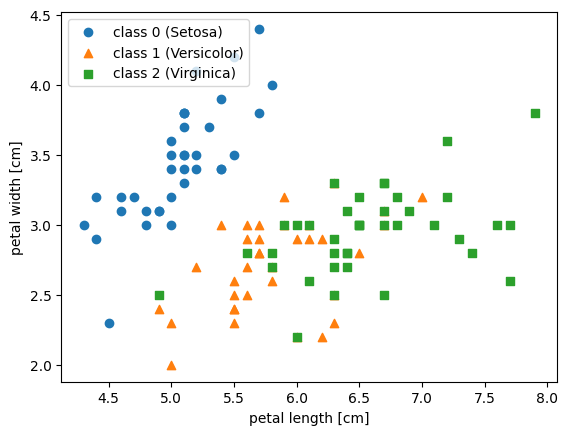

In [51]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

Fitting the k-Nearest-Neighbour model:

In [52]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Use kNN Model to Make Predictions:

In [53]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1], dtype=int64)

In [54]:
y_test

array([0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1], dtype=int64)

In [55]:
y_pred == y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [56]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

# print('Test set accuracy: %.2f%%' % accuracy)

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 97.50%
